In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import misc
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.gridspec as gridspec
from PIL import Image
import imageio

%matplotlib inline

In [2]:
df = pd.read_csv('Data/2001_stats.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team           65 non-null     object
 1   Drives         65 non-null     object
 2   Yds/Dr Rank    65 non-null     object
 3   Yds/Dr         65 non-null     object
 4   Pts/Dr Rank    65 non-null     object
 5   Pts/Dr         65 non-null     object
 6   TO/Dr Rank     65 non-null     object
 7   TO/Dr          65 non-null     object
 8   INT/Dr Rank    65 non-null     object
 9   INT/Dr         65 non-null     object
 10  FUM/Dr Rank    65 non-null     object
 11  FUM/Dr         65 non-null     object
 12  LOS/Dr Rank    65 non-null     object
 13  LOS/Dr         65 non-null     object
 14  Plays/Dr Rank  65 non-null     object
 15  Plays/Dr       65 non-null     object
 16  TOP/Dr Rank    65 non-null     object
 17  TOP/Dr         65 non-null     object
 18  DSR Rank       65 non-null     o

In [4]:
rel_cols = ['Team', 'Drives', 'Yds/Dr Rank', 'Yds/Dr', 'Pts/Dr Rank', 'Pts/Dr', 'Plays/Dr','DSR Rank', 'DSR', 'Year']

In [5]:
def clean_data(data):
    df = pd.read_csv(data)
    string = data[5:9]
    teams = list(df['Team'].value_counts().index)
    total_teams = len(teams)
    df = df.iloc[:total_teams,:]
    df = df[df['Team'] != 'Team']
    df['Year'] = string
    df = df[rel_cols]
    return df

In [6]:
merged = pd.DataFrame()
for i in range(2000,2022):
    file = 'Data/' + str(i) + '_stats.csv'
    df = clean_data(file)
    merged = merged.append(df)

In [7]:
merged.append(df)

,Team,Drives,Yds/Dr Rank,Yds/Dr,Pts/Dr Rank,Pts/Dr,Plays/Dr,DSR Rank,DSR,Year
0,TEN,187,1,20.25,2,0.91,4.97,2,.558,2000
1,BAL,189,2,20.93,1,0.80,4.95,1,.555,2000
2,BUF,193,3,22.66,14,1.59,5.15,4,.609,2000
3,TB,199,4,23.20,5,1.28,5.39,6,.622,2000
4,NYJ,195,5,24.06,9,1.42,5.43,5,.614,2000
...,...,...,...,...,...,...,...,...,...,...
28,IND,28,28,41.32,28,2.86,6.39,28,.778,2021
29,WAS,31,29,41.68,29,2.97,7.35,29,.778,2021
30,DET,29,25,39.83,30,3.03,6.07,25,.763,2021
31,GB,27,22,36.96,31,3.07,6.70,31,.807,2021


In [8]:
shifted = ['Yds/Dr Rank', 'Yds/Dr', 'Pts/Dr Rank', 'Pts/Dr', 'DSR Rank', 'DSR']

In [9]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 32
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Team         724 non-null    object
 1   Drives       722 non-null    object
 2   Yds/Dr Rank  722 non-null    object
 3   Yds/Dr       724 non-null    object
 4   Pts/Dr Rank  722 non-null    object
 5   Pts/Dr       724 non-null    object
 6   Plays/Dr     724 non-null    object
 7   DSR Rank     722 non-null    object
 8   DSR          724 non-null    object
 9   Year         724 non-null    object
dtypes: object(10)
memory usage: 62.2+ KB


In [10]:
grouped = merged.groupby(['Team', 'Year']).sum().reset_index()

In [11]:
for col in shifted:
    grouped[col+'_shift'] = grouped.groupby('Team')[col].shift() 

In [12]:
nums = list(grouped.columns[1:])

In [13]:
grouped[nums] = grouped[nums].astype('float')

In [14]:
grouped

,Team,Year,Drives,Yds/Dr Rank,Yds/Dr,Pts/Dr Rank,Pts/Dr,Plays/Dr,DSR Rank,DSR,Yds/Dr Rank_shift,Yds/Dr_shift,Pts/Dr Rank_shift,Pts/Dr_shift,DSR Rank_shift,DSR_shift
0,ARI,2000.0,172.0,28.0,32.92,31.0,2.41,6.30,31.0,0.735,NaN,NaN,NaN,NaN,NaN,NaN
1,ARI,2001.0,182.0,25.0,29.92,22.0,1.77,6.03,26.0,0.687,28.0,32.92,31.0,2.41,31.0,0.735
2,ARI,2002.0,179.0,29.0,32.91,29.0,2.16,5.95,30.0,0.716,25.0,29.92,22.0,1.77,26.0,0.687
3,ARI,2003.0,179.0,28.0,30.41,31.0,2.18,5.65,32.0,0.712,29.0,32.91,29.0,2.16,30.0,0.716
4,ARI,2004.0,199.0,8.0,24.94,11.0,1.45,5.10,7.0,0.625,28.0,30.41,31.0,2.18,32.0,0.712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,WAS,2017.0,189.0,10.0,28.72,19.0,1.86,5.71,11.0,0.667,31.0,36.38,24.0,2.18,32.0,0.749
720,WAS,2018.0,163.0,25.0,35.15,18.0,2.04,6.21,23.0,0.727,10.0,28.72,19.0,1.86,11.0,0.667
721,WAS,2019.0,169.0,26.0,35.73,30.0,2.46,6.50,29.0,0.747,25.0,35.15,18.0,2.04,23.0,0.727
722,WAS,2020.0,182.0,3.0,27.07,3.0,1.74,5.59,3.0,0.663,26.0,35.73,30.0,2.46,29.0,0.747


In [15]:
for col in shifted:
    grouped[col+'_change'] = grouped[col+'_shift'] - grouped[col]

In [16]:
grouped = grouped.dropna()

In [17]:
shifted_list = []
for col in shifted:
    shifted_list.append(col+'_shift')

In [18]:
new_df = grouped.copy()

In [19]:
new_df.sort_values(by='Pts/Dr_change').head(20)

,Team,Year,Drives,Yds/Dr Rank,Yds/Dr,Pts/Dr Rank,Pts/Dr,Plays/Dr,DSR Rank,DSR,...,Pts/Dr Rank_shift,Pts/Dr_shift,DSR Rank_shift,DSR_shift,Yds/Dr Rank_change,Yds/Dr_change,Pts/Dr Rank_change,Pts/Dr_change,DSR Rank_change,DSR_change
427,NE,2020.0,150.0,24.0,37.61,18.0,2.26,6.64,22.0,0.753,...,1.0,1.02,1.0,0.611,-23.0,-14.21,-17.0,-1.24,-21.0,-0.142
723,WAS,2021.0,31.0,29.0,41.68,29.0,2.97,7.35,29.0,0.778,...,3.0,1.74,3.0,0.663,-26.0,-14.61,-26.0,-1.23,-26.0,-0.115
349,KC,2021.0,29.0,31.0,43.07,32.0,3.28,6.41,32.0,0.826,...,13.0,2.13,19.0,0.743,-12.0,-7.42,-19.0,-1.15,-13.0,-0.083
123,CHI,2013.0,172.0,32.0,37.27,31.0,2.44,6.05,31.0,0.740,...,1.0,1.31,2.0,0.633,-27.0,-10.50,-30.0,-1.13,-29.0,-0.107
681,TEN,2001.0,188.0,26.0,29.99,26.0,1.99,5.41,25.0,0.676,...,2.0,0.91,2.0,0.558,-25.0,-9.74,-24.0,-1.08,-23.0,-0.118
370,MIA,2007.0,169.0,31.0,32.28,32.0,2.41,5.96,31.0,0.721,...,6.0,1.46,7.0,0.633,-23.0,-6.87,-26.0,-0.95,-24.0,-0.088
112,CHI,2002.0,194.0,18.0,29.02,22.0,1.91,5.78,16.0,0.676,...,1.0,0.96,4.0,0.621,-7.0,-2.99,-21.0,-0.95,-12.0,-0.055
405,MIN,2020.0,165.0,26.0,37.98,28.0,2.68,6.46,26.0,0.759,...,8.0,1.76,13.0,0.698,-8.0,-5.32,-20.0,-0.92,-13.0,-0.061
689,TEN,2009.0,186.0,23.0,31.18,28.0,2.12,5.69,26.0,0.699,...,3.0,1.22,5.0,0.623,-18.0,-6.31,-25.0,-0.90,-21.0,-0.076
669,TB,2011.0,176.0,30.0,36.35,32.0,2.61,5.78,32.0,0.748,...,15.0,1.72,23.0,0.690,-8.0,-6.00,-17.0,-0.89,-9.0,-0.058


## Creating Charts

In [20]:
df_2021 = grouped[grouped['Year'] == 2021]

In [21]:
df_2021 = df_2021[df_2021['Team'] != 'NFL']

In [22]:
teams = list(df_2021['Team'].values)
names = []
for team in teams:
    names.append('Data/' + team +'.png')

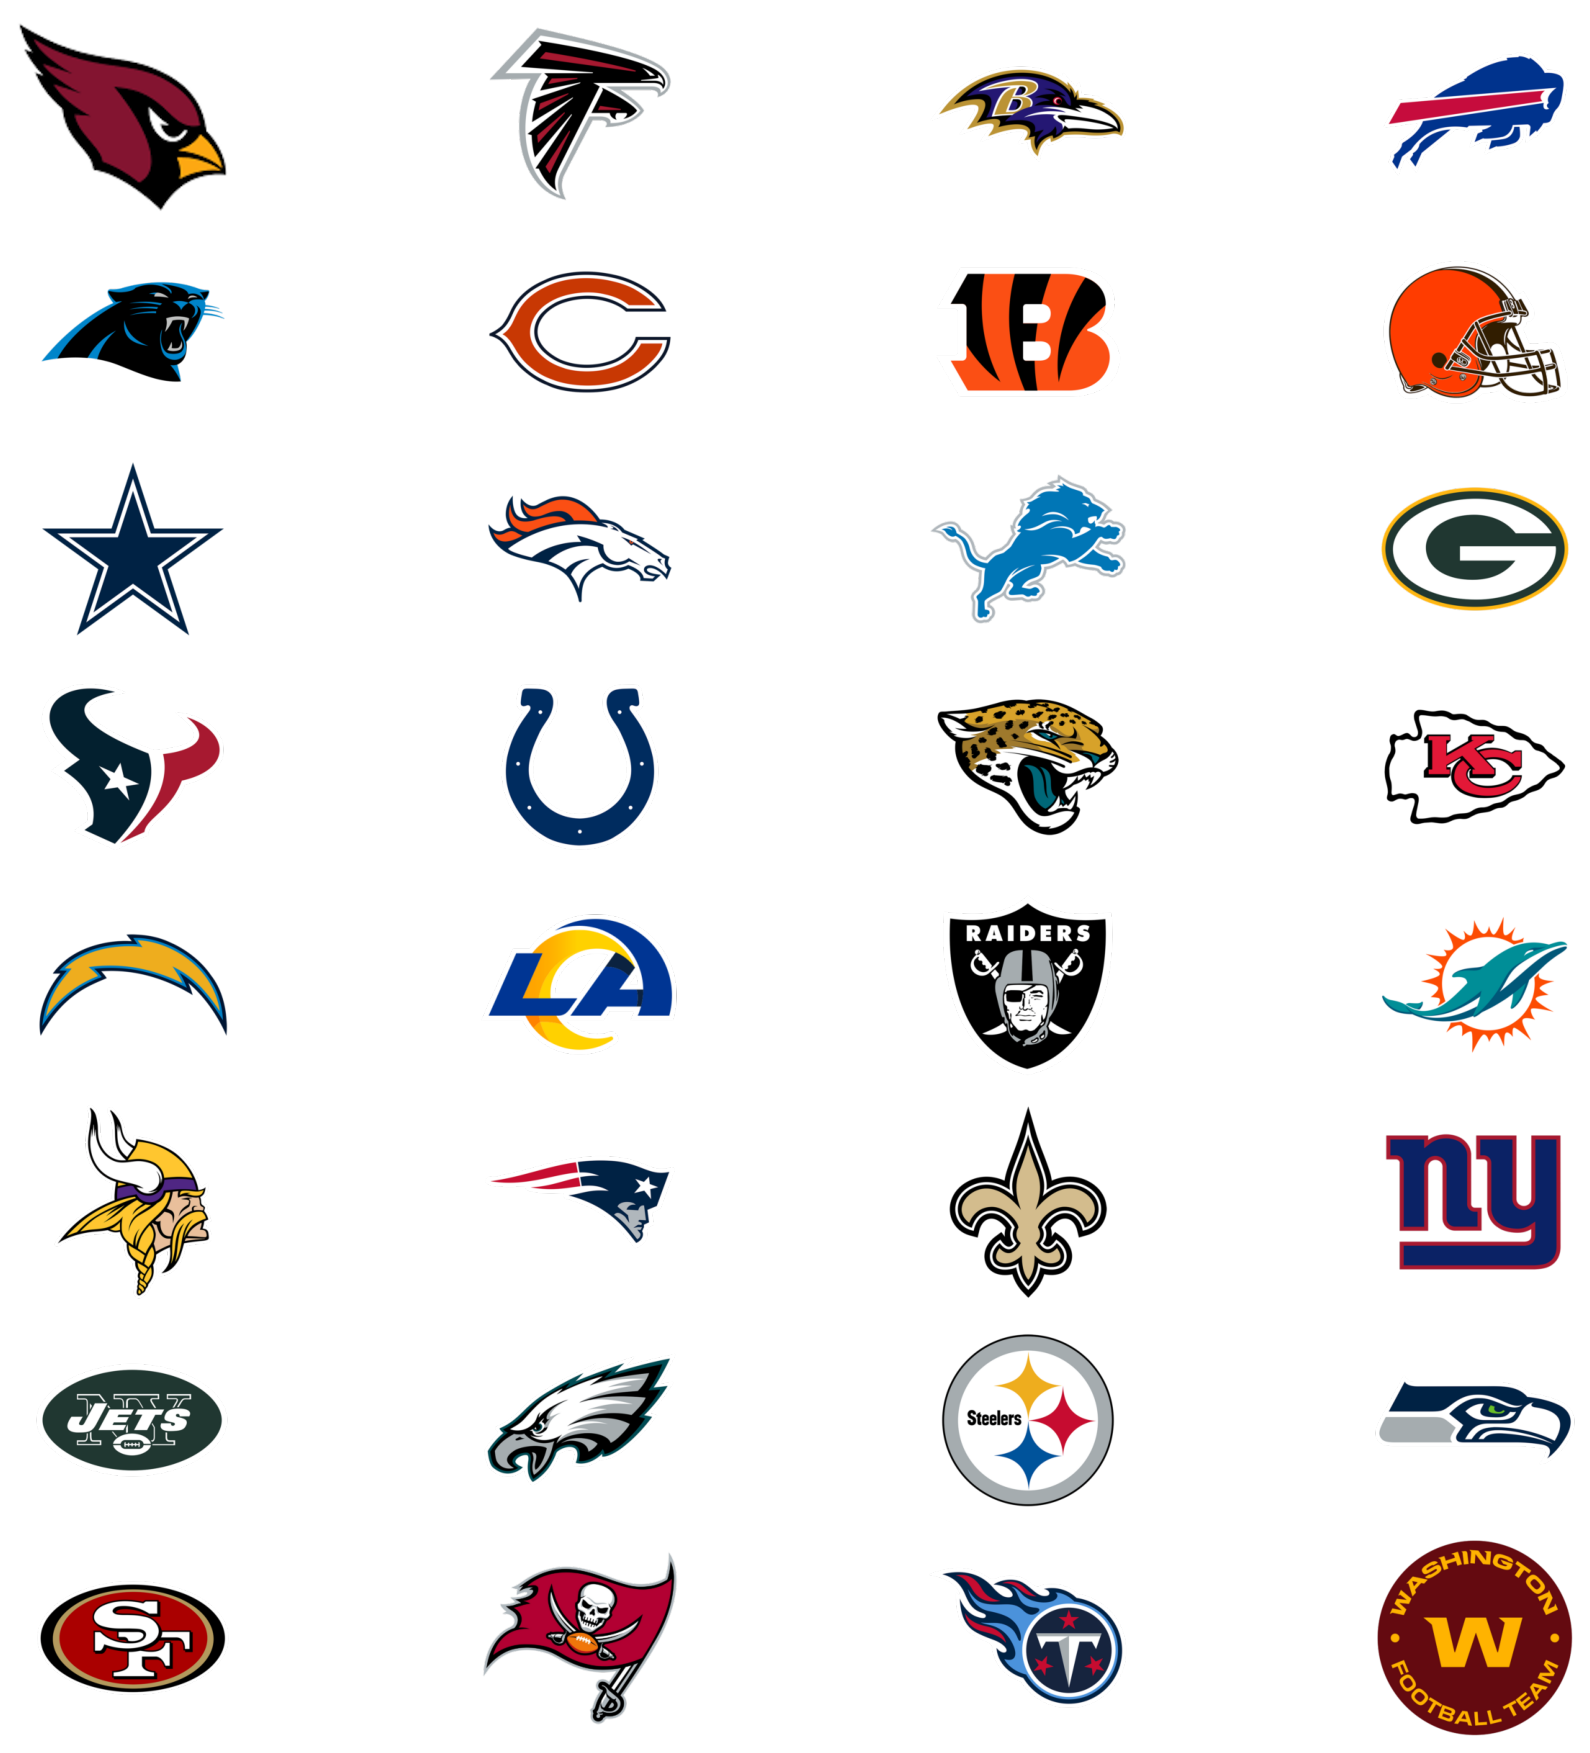

In [23]:
# use gridspec to create the subplots
plt.figure(figsize=(32,32))
gs1 = gridspec.GridSpec(8, 4)
gs1.update(wspace=0.01, hspace=0.01) # set the spacing between axes. 

for i,name in enumerate(names):
    ax1 = plt.subplot(gs1[i])
    Im = Image.open(name) # convert png string to an image format
    ax1.imshow(Im) # plot image
    plt.gca().axis('off')

In [24]:
colors = pd.read_csv("https://raw.githubusercontent.com/leesharpe/nfldata/master/data/teamcolors.csv")

In [25]:
colors = colors[['team', 'color']]

In [26]:
colors = colors.rename(columns={'team': 'Team'})

In [27]:
df_2021 = df_2021.merge(colors, how='inner', on='Team')

In [28]:
df_2021 = df_2021.sort_values(by=('Pts/Dr Rank_change'), ascending=False).reset_index(drop=True)

In [29]:
pos = df_2021.iloc[0:18:,:]

In [30]:
neg = df_2021.iloc[18:,:].reset_index(drop=True)

In [31]:
X2 = pos.index.values
Y2 = pos['Pts/Dr Rank_shift'].values
X1 = pos.index.values
Y1 = pos['Pts/Dr Rank'].values
names = pos['Team'].values
colors = pos['color'].values

In [32]:
plt.style.use('fivethirtyeight')

In [33]:
def scatter_plot_with_logos(X,Y,X2,Y2,names,colors):   
    artists = []
    for d,o,d2,o2,name,c in zip(X,Y,X2,Y2,names,colors):
        plt.plot(d2,o2,'o',color=c,markersize=16)
        plt.plot([d,d2],[o,o2],'--',color=c)
        im = imageio.imread('Data/' + name +'.png')
        im2 = OffsetImage(im, zoom=0.15,alpha=0.8)
        ab = AnnotationBbox(im2, (d, o), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))

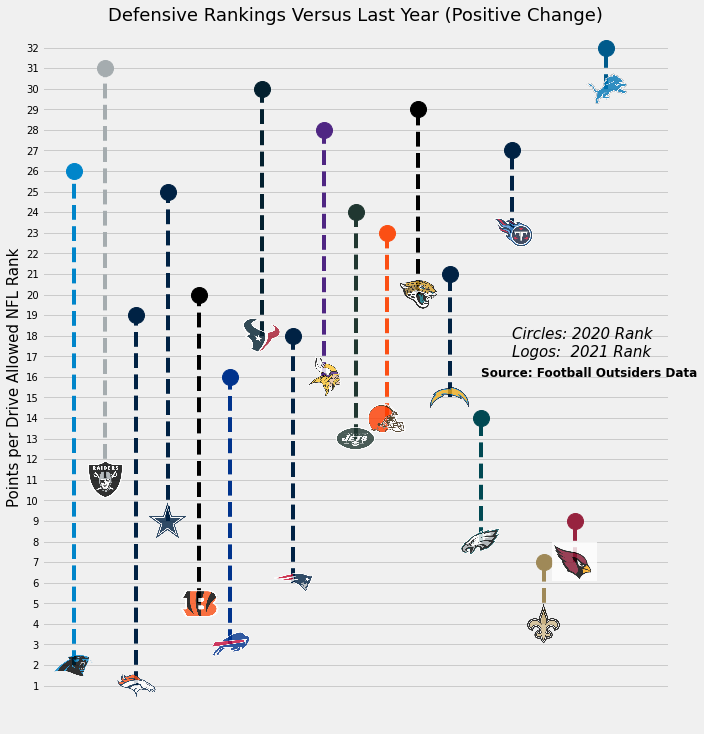

In [34]:
fig, ax = plt.subplots(figsize=(10,12))

# call function
scatter_plot_with_logos(X1,Y1,X2,Y2,names,colors)

# create labels and title 
plt.xticks([])
plt.yticks([i for i in range(1,33)], size=10)
plt.ylabel(r'Points per Drive Allowed NFL Rank',fontsize=15)
plt.ylim([-1,33]);
plt.xlim([-1,19]);
plt.title('Defensive Rankings Versus Last Year (Positive Change)',fontsize=18)
plt.text(13,16,'Source: Football Outsiders Data',color='black',fontsize=12,weight = 'bold')
plt.text(14,17,'Circles: 2020 Rank \nLogos:  2021 Rank',fontsize=15,style='italic');
plt.savefig('Pos_Def_rankings')

In [35]:
X2 = neg.index.values
Y2 = neg['Pts/Dr Rank_shift'].values
X1 = neg.index.values
Y1 = neg['Pts/Dr Rank'].values
names = neg['Team'].values
colors = neg['color'].values

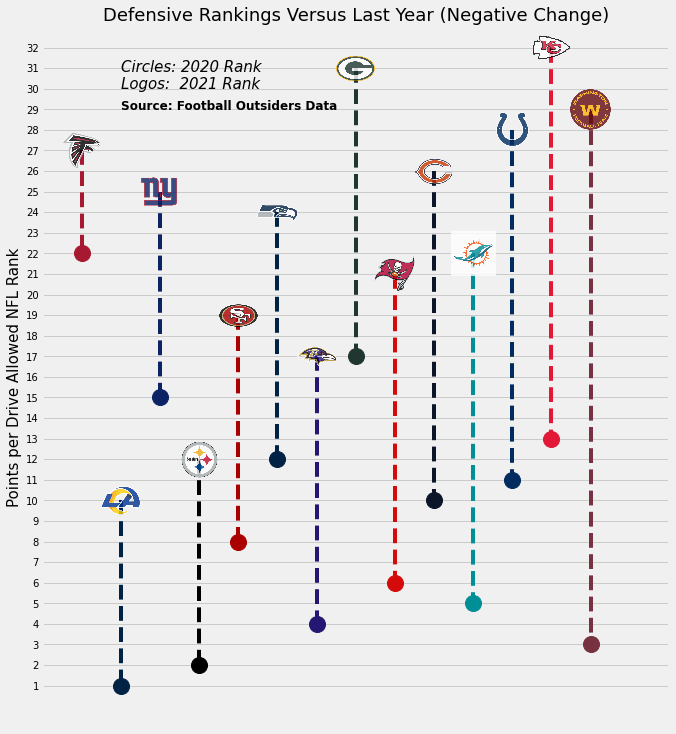

In [36]:
fig, ax = plt.subplots(figsize=(10,12))

# call function
scatter_plot_with_logos(X1,Y1,X2,Y2,names,colors)

# create labels and title 
plt.xticks([])
plt.yticks([i for i in range(1,33)], size=10)
plt.ylabel(r'Points per Drive Allowed NFL Rank',fontsize=15)
plt.ylim([-1,33]);
plt.xlim([-1,15]);
plt.title('Defensive Rankings Versus Last Year (Negative Change)',fontsize=18)
plt.text(1,29,'Source: Football Outsiders Data',color='black',fontsize=12,weight = 'bold')
plt.text(1,30,'Circles: 2020 Rank \nLogos:  2021 Rank',fontsize=15,style='italic');
plt.savefig('Neg_Def_rankings')

In [40]:
worst_jumps = new_df.sort_values(by='DSR Rank_change')[0:10].reset_index(drop=True)

In [42]:
worst_jumps

,Team,Year,Drives,Yds/Dr Rank,Yds/Dr,Pts/Dr Rank,Pts/Dr,Plays/Dr,DSR Rank,DSR,...,Pts/Dr Rank_shift,Pts/Dr_shift,DSR Rank_shift,DSR_shift,Yds/Dr Rank_change,Yds/Dr_change,Pts/Dr Rank_change,Pts/Dr_change,DSR Rank_change,DSR_change
0,CHI,2013.0,172.0,32.0,37.27,31.0,2.44,6.05,31.0,0.740,...,1.0,1.31,2.0,0.633,-27.0,-10.50,-30.0,-1.13,-29.0,-0.107
1,HOU,2019.0,162.0,31.0,37.64,27.0,2.32,6.40,30.0,0.747,...,4.0,1.71,2.0,0.667,-25.0,-8.43,-23.0,-0.61,-28.0,-0.080
2,BUF,2005.0,171.0,31.0,31.74,28.0,2.01,6.13,31.0,0.725,...,6.0,1.40,4.0,0.614,-30.0,-9.21,-22.0,-0.61,-27.0,-0.111
3,KC,2008.0,175.0,30.0,35.82,30.0,2.39,6.11,30.0,0.727,...,13.0,1.59,3.0,0.636,-21.0,-9.10,-17.0,-0.80,-27.0,-0.091
4,WAS,2021.0,31.0,29.0,41.68,29.0,2.97,7.35,29.0,0.778,...,3.0,1.74,3.0,0.663,-26.0,-14.61,-26.0,-1.23,-26.0,-0.115
5,GB,2011.0,178.0,29.0,35.64,23.0,1.96,6.02,28.0,0.722,...,2.0,1.24,2.0,0.628,-22.0,-9.15,-21.0,-0.72,-26.0,-0.094
6,BUF,2001.0,173.0,28.0,30.74,30.0,2.23,5.74,29.0,0.699,...,14.0,1.59,4.0,0.609,-25.0,-8.08,-16.0,-0.64,-25.0,-0.090
7,LAR,2021.0,28.0,24.0,39.00,10.0,1.96,7.50,26.0,0.768,...,1.0,1.48,1.0,0.648,-23.0,-14.04,-9.0,-0.48,-25.0,-0.120
8,HOU,2003.0,178.0,32.0,33.52,26.0,1.92,6.08,30.0,0.704,...,11.0,1.65,6.0,0.640,-27.0,-8.29,-15.0,-0.27,-24.0,-0.064
9,MIA,2007.0,169.0,31.0,32.28,32.0,2.41,5.96,31.0,0.721,...,6.0,1.46,7.0,0.633,-23.0,-6.87,-26.0,-0.95,-24.0,-0.088


In [43]:
output = worst_jumps[['Team', 'Year', 'DSR Rank_change', 'Pts/Dr Rank_change', 'Yds/Dr Rank_change']]

In [44]:
output['Year'] = output['Year'].astype('int')

<ipython-input-44-8a087e00013c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['Year'] = output['Year'].astype('int')


In [46]:
output = output.rename(columns={'DSR Rank_change': 'DSR Rank Drop', 'Pts/Dr Rank_change': 'Pts/Dr Rank Drop'})

In [48]:
output = output.rename(columns={'Yds/Dr Rank_change': 'Yds/Dr Rank Drop'})

In [49]:
output

,Team,Year,DSR Rank Drop,Pts/Dr Rank Drop,Yds/Dr Rank Drop
0,CHI,2013,-29.0,-30.0,-27.0
1,HOU,2019,-28.0,-23.0,-25.0
2,BUF,2005,-27.0,-22.0,-30.0
3,KC,2008,-27.0,-17.0,-21.0
4,WAS,2021,-26.0,-26.0,-26.0
5,GB,2011,-26.0,-21.0,-22.0
6,BUF,2001,-25.0,-16.0,-25.0
7,LAR,2021,-25.0,-9.0,-23.0
8,HOU,2003,-24.0,-15.0,-27.0
9,MIA,2007,-24.0,-26.0,-23.0


In [39]:
colors = pd.read_csv("https://raw.githubusercontent.com/leesharpe/nfldata/master/data/teamcolors.csv")
colors = colors[['team', 'color']]
colors = colors.rename(columns={'team': 'Team'})

In [40]:
worst_jumps = worst_jumps.merge(colors, how='inner', on='Team')

In [41]:
X2 = worst_jumps['Yds/Dr_shift'].values
Y2 = worst_jumps['Pts/Dr_shift'].values
X1 = worst_jumps['Yds/Dr'].values
Y1 = worst_jumps['Pts/Dr'].values
names = worst_jumps['Team'].values
colors = worst_jumps['color'].values
years = worst_jumps['Year'].values
years = [int(year) for year in years]

In [42]:
def scatter_plot_with_logos(X,Y,X2,Y2,names,colors,years):   
    artists = []
    for d,o,d2,o2,name,c,y in zip(X,Y,X2,Y2,names,colors,years):
        plt.plot(d2,o2,'o',color=c,markersize=16)
        plt.plot([d,d2],[o,o2],'--',color=c)
        plt.annotate(y, (d-1.5,o), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
        im = imageio.imread('Data/' + name +'.png')
        im2 = OffsetImage(im, zoom=0.15,alpha=0.8)
        ab = AnnotationBbox(im2, (d, o), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))

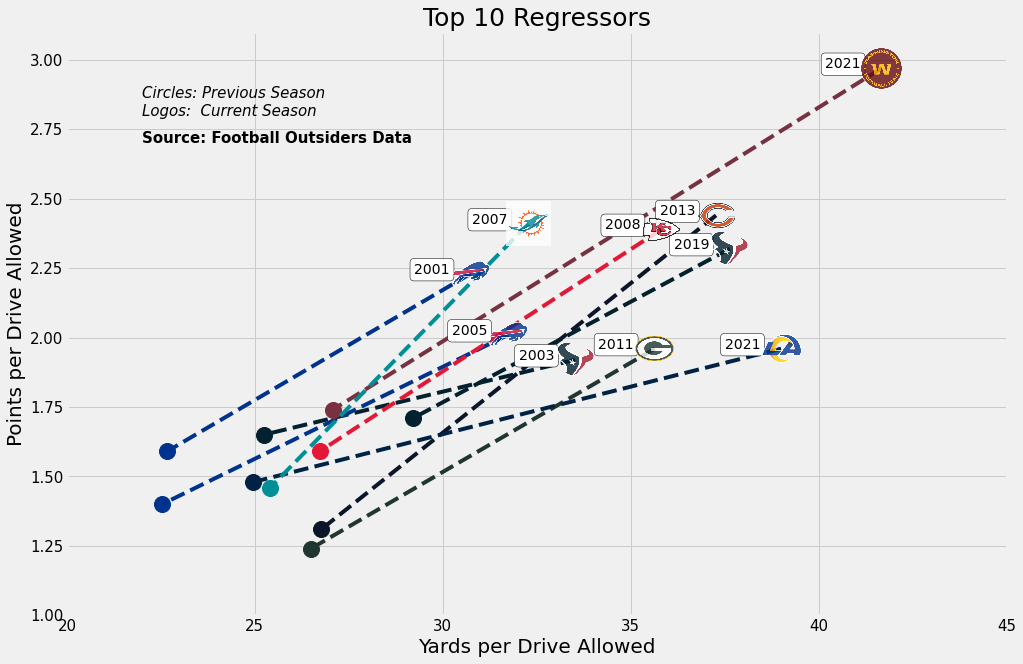

In [43]:
fig, ax = plt.subplots(figsize=(15,10))

# call function
scatter_plot_with_logos(X1,Y1,X2,Y2,names,colors,years)

# create labels and title 
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel(r'Points per Drive Allowed',fontsize=20)
plt.xlabel(r'Yards per Drive Allowed',fontsize=20)
plt.ylim([1,3.1]);
plt.xlim([20,45]);
plt.title('Top 10 Regressors',fontsize=25)
plt.text(22,2.7,'Source: Football Outsiders Data',color='black',fontsize=15,weight = 'bold')
plt.text(22,2.8,'Circles: Previous Season \nLogos:  Current Season',fontsize=15,style='italic');
plt.savefig('Top_10')